<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 1: Standardized Test Analysis



# Vivek Bavda:
## DSIR 7/12
### Project 1 July 26, 2021 
### SAT or ACT: Analysis on Political Implications












### Introduction:
*As the Mayors of California are aware, standardized tests provide only a snapshot of student performance. These snapshots often define whether the educational agenda of each of your programs is successful. With this in mind, this data analysis seeks to benchmark which test the state of California should institute as a requirement for its high school students. The SAT and ACT  are compared to determine which test best reflects the achievement of California's students and which test results should be promoted to support your political agenda.*

### Contents:
- [Background](#Background)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-Data)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

## Background

The SAT and ACT are standardized tests that many colleges and universities in the United States require for their admissions process. This score is used along with other materials such as grade point average (GPA) and essay responses to determine whether or not a potential student will be accepted to the university. However, despite growth in local determined outcomes, the SAT and ACT snapshots often are seen as the main evaluation point by your constituents. To the extent our students score well, it allows us greater political capital to institue educational reforms. It is imperative that we choose and mandate by state and local regulations which test demonstrates higher scores and bests represents our students' achievements as well as builds political capital.

This requires us to analyze the format and results of the SAT and ACT. The SAT has two sections of the test: Evidence-Based Reading and Writing and Math ([*source*](https://www.princetonreview.com/college/sat-sections.)) The ACT has 4 sections: English, Mathematics, Reading, and Science, with an additional optional writing section ([*source*](https://www.act.org/content/act/en/products-and-services/the-act/scores/understanding-your-scores.html)). 
* [SAT](https://collegereadiness.collegeboard.org/sat)
* [ACT](https://www.act.org/content/act/en.html)

It is important to also keep in mind that standardized tests have long been a controversial topic for students, administrators, and legislators. Since the 1940's, an increasing number of colleges have been using scores from students' performances on tests like the SAT and the ACT as a measure for college readiness and aptitude ([*source*](https://www.minotdailynews.com/news/local-news/2017/04/a-brief-history-of-the-sat-and-act/)). Supporters of these tests argue that these scores can be used as an objective measure to determine college admittance. Opponents of these tests claim that these tests are not accurate measures of students potential or ability and serve as an inequitable barrier to entry. Lately, more and more schools are opting to drop the SAT/ACT requirement for their Fall 2021 applications ([*read more about this here*](https://www.cnn.com/2020/04/14/us/coronavirus-colleges-sat-act-test-trnd/index.html)).
Even with this trend, our political calculus has not changed. Most people in our cities use SAT and ACT has shorthand. Therefore, a decision needs to be made regarding ACT and SAT to measure high school outcomes.



### California ACT and SAT datasets from 2018 - 2019 were used in this analysis.

* [`act_2019_ca.csv`](../data/act_2019_ca.csv): 2019 ACT Scores in California by School, District, and County. 

    The total number of testtakers is listed.The average scores for the four parts of the test (English, Reading, Math, and Science) is listed. The composite score of the four parts is benchmarked by listing the number of students greater than or equal to the score 21 is also listed.The data was collected from https://www.cde.ca.gov/ds/sp/ai/

* [`sat_2019_ca.csv`](../data/sat_2019_ca.csv): 2019 SAT Scores in California by School, District and County. The data was collected from https://www.cde.ca.gov/ds/sp/ai/
    The total number of testakers is listed. The dataset also breaks the scores down by grade level. Benchmarks are listed for the two measurement categories. First, the number of students who met or exceeded the benchmark for reading & writing is listed. Second, the number of students who met or exceeded the benchmark for math. There is also a category for meeting both benchmarks.
    
* ['Bavda.csv'](../data/Bavda.csv): This dataset was created from adjustments to the above datasets and were merged together.
    


### Outside Research

While no outside research was done, I was a teacher in California and studied testing/education reform in graduate school. I have a strong foundation of knowledge about the CA educational system

### Coding Challenges

1. Manually calculate mean:

    Write a function that takes in values and returns the mean of the values. Create a list of numbers that you test on your function to check to make sure your function works!
    
    *Note*: Do not use any mean methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [1]:
# Mean Code:
meannumberstry=[5,9,3]
def mean_wo_np(meannumbers):
    return sum(meannumbers)/len(meannumbers)
mean_wo_np(meannumberstry)

5.666666666666667

2. Manually calculate standard deviation:

    The formula for standard deviation is below:

    $$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

    Where $x_i$ represents each value in the dataset, $\mu$ represents the mean of all values in the dataset and $n$ represents the number of values in the dataset.

    Write a function that takes in values and returns the standard deviation of the values using the formula above. Hint: use the function you wrote above to calculate the mean! Use the list of numbers you created above to test on your function.
    
    *Note*: Do not use any standard deviation methods built-in to any Python libraries to do this! This should be done without importing any additional libraries.

In [2]:
# Code: Standard Deviation Calculation
meannumberstry=[1,8,-4,9,6]
def standard_deviation(stdmeannumbers):
    return (sum([((stdmeannumber-mean_wo_np(stdmeannumbers))**2)\
            for stdmeannumber in stdmeannumbers])/len(stdmeannumbers)) ** .5


standard_deviation(meannumberstry)



4.857983120596447

3. Data cleaning function:
    
    Write a function that takes in a string that is a number and a percent symbol (ex. '50%', '30.5%', etc.) and converts this to a float that is the decimal approximation of the percent. For example, inputting '50%' in your function should return 0.5, '30.5%' should return 0.305, etc. Make sure to test your function to make sure it works!

You will use these functions later on in the project!

In [3]:
# Code for turning percents or whole numbers into decimals

def percent_decimal(percent_input):
    if '%' in percent_input:
        return float(percent_input.strip('%'))/100
    else:
        return (float(percent_input))/100
percent_decimal('50.09%')


    
#Source used for this function:https://stackoverflow.com/questions/12432663/what-is-a-clean-way-to-convert-a-string-percent-to-a-float

0.5009

--- 
# Part 2

Part 2 requires knowledge of Pandas, EDA, data cleaning, and data visualization.

---

*All libraries used should be added here*

In [4]:
# Imports:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data import of California 2018-2019 ACT and SAT datasets used in analysis
ca_sat_2019 = '../data/sat_2019_ca.csv'
ca_act_2019 = '../data/act_2019_ca.csv'
#resultrestrictive.to_csv(r'../data/Bavda.csv')--how I saved the dataframe into csv file.
result = '../data/Bavda.csv'





In [5]:
dfa = pd.read_csv(ca_act_2019)
dfs = pd.read_csv(ca_sat_2019)
resultrestrictive = pd.read_csv(result)

## Data Import and Cleaning

### Data Import & Cleaning

Import the datasets that you selected for this project and go through the following steps at a minimum. You are welcome to do further cleaning as you feel necessary:
1. Display the data: print the first 5 rows of each dataframe to your Jupyter notebook.
2. Check for missing values.
3. Check for any obvious issues with the observations (keep in mind the minimum & maximum possible values for each test/subtest).
4. Fix any errors you identified in steps 2-3.
5. Display the data types of each feature.
6. Fix any incorrect data types found in step 5.
    - Fix any individual values preventing other columns from being the appropriate type.
    - If your dataset has a column of percents (ex. '50%', '30.5%', etc.), use the function you wrote in Part 1 (coding challenges, number 3) to convert this to floats! *Hint*: use `.map()` or `.apply()`.
7. Rename Columns.
    - Column names should be all lowercase.
    - Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`).
    - Column names should be unique and informative.
8. Drop unnecessary rows (if needed).
9. Merge dataframes that can be merged.
10. Perform any additional cleaning that you feel is necessary.
11. Save your cleaned and merged dataframes as csv files.

In [6]:
# Code for Data Import and Cleaning:

#First 5 rows of SAT data frame code is below
dfs.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,...,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,...,*,*,*,*,*,*,*,*,2018-19,NaN


In [7]:
#First 5 rows of ACT data frame code is below
dfa.head()

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2018-19,NaN


In [8]:
#checking data types
dfa.dtypes

CDS            float64
CCode          float64
CDCode         float64
SCode          float64
RType           object
SName           object
DName           object
CName           object
Enroll12       float64
NumTstTakr     float64
AvgScrRead      object
AvgScrEng       object
AvgScrMath      object
AvgScrSci       object
NumGE21         object
PctGE21         object
Year            object
Unnamed: 17    float64
dtype: object

In [9]:
#checking data types
dfs.dtypes

CDS                      float64
CCode                    float64
CDCode                   float64
SCode                    float64
RType                     object
SName                     object
DName                     object
CName                     object
Enroll12                 float64
NumTSTTakr12             float64
NumERWBenchmark12         object
PctERWBenchmark12         object
NumMathBenchmark12        object
PctMathBenchmark12        object
Enroll11                 float64
NumTSTTakr11             float64
NumERWBenchmark11         object
PctERWBenchmark11         object
NumMathBenchmark11        object
PctMathBenchmark11        object
TotNumBothBenchmark12     object
PctBothBenchmark12        object
TotNumBothBenchmark11     object
PctBothBenchmark11        object
Year                      object
Unnamed: 25              float64
dtype: object

In [10]:
#checking for nulls
dfs.isnull().sum()

CDS                         1
CCode                       1
CDCode                      1
SCode                       1
RType                       1
SName                     598
DName                      59
CName                       1
Enroll12                    1
NumTSTTakr12                1
NumERWBenchmark12         276
PctERWBenchmark12         276
NumMathBenchmark12        276
PctMathBenchmark12        276
Enroll11                    1
NumTSTTakr11                1
NumERWBenchmark11         311
PctERWBenchmark11         311
NumMathBenchmark11        311
PctMathBenchmark11        311
TotNumBothBenchmark12     276
PctBothBenchmark12        276
TotNumBothBenchmark11     311
PctBothBenchmark11        311
Year                        1
Unnamed: 25              2580
dtype: int64

In [11]:
dfa.isnull().sum()
#checking for nulls in other dataframe

CDS               1
CCode             1
CDCode            1
SCode           523
RType             1
SName           581
DName            59
CName             1
Enroll12          1
NumTstTakr        1
AvgScrRead      357
AvgScrEng       357
AvgScrMath      357
AvgScrSci       357
NumGE21         357
PctGE21         357
Year              1
Unnamed: 17    2310
dtype: int64

In [12]:
#seeing pattern for missing values
pattern1s = dfs.isnull()[~dfs.isnull().duplicated()]\
             .applymap(lambda x: int(x))
pattern1s

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,NumERWBenchmark11,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,0,0,1,1,0,1
36,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
1981,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2012,0,0,0,0,0,1,1,0,0,0,...,1,1,1,1,1,1,1,1,0,1
2037,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2051,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,1
2103,0,0,0,0,0,1,0,0,0,0,...,1,1,1,1,0,0,1,1,0,1
2138,0,0,0,0,0,1,0,0,0,0,...,1,1,1,1,1,1,1,1,0,1


In [13]:
#seeing pattern for missing values
pattern1a = dfa.isnull()[~dfa.isnull().duplicated()]\
             .applymap(lambda x: int(x))
pattern1a

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17
0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1064,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1
1103,0,0,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0,1
1122,0,0,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,1
1123,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2309,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [14]:

 # count up appearance of each pattern
lister = []
for i in range(len(pattern1a)):
    counter = 0
    for j in dfa.isnull().values:
        if np.array_equal(j, pattern1a.values[i]):
            counter += 1
    lister.append(counter)
lister

[292, 1437, 57, 1, 63, 459, 1]

In [15]:
 # count up appearance of each pattern
listers = []
for i in range(len(pattern1s)):
    counter = 0
    for j in dfs.isnull().values:
        if np.array_equal(j, pattern1s.values[i]):
            counter += 1
    listers.append(counter)
listers

[121, 1602, 144, 115, 57, 1, 484, 11, 17, 27, 1]

In [16]:
pattern1a.reset_index(inplace = True, drop = True)
pattern1s.reset_index(inplace = True, drop = True)

In [17]:
# number of times a pattern appears in dataset
pattern1a['count'] = lister

pattern1s['count'] = listers

In [18]:
#sort values
pattern1a.sort_values('count', ascending = False)

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTstTakr,AvgScrRead,AvgScrEng,AvgScrMath,AvgScrSci,NumGE21,PctGE21,Year,Unnamed: 17,count
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1437
5,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,459
0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,1,292
4,0,0,0,1,0,1,0,0,0,0,1,1,1,1,1,1,0,1,63
2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,57
3,0,0,0,0,0,1,1,0,0,0,1,1,1,1,1,1,0,1,1
6,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [19]:
pattern1s.sort_values('count', ascending = False)

,CDS,CCode,CDCode,SCode,RType,SName,DName,CName,Enroll12,NumTSTTakr12,...,PctERWBenchmark11,NumMathBenchmark11,PctMathBenchmark11,TotNumBothBenchmark12,PctBothBenchmark12,TotNumBothBenchmark11,PctBothBenchmark11,Year,Unnamed: 25,count
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1602
6,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,484
2,0,0,0,0,0,0,0,0,0,0,...,1,1,1,0,0,1,1,0,1,144
0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,1,121
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,115
4,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,57
9,0,0,0,0,0,1,0,0,0,0,...,1,1,1,1,1,1,1,0,1,27
8,0,0,0,0,0,1,0,0,0,0,...,1,1,1,0,0,1,1,0,1,17
7,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,1,11
5,0,0,0,0,0,1,1,0,0,0,...,1,1,1,1,1,1,1,0,1,1


In [20]:
# Change the column names using the `.rename()` function for SAT
# Original column: renamed column
srename_map = {'CDS': 'county_district_school_code','CCode': 'county_code', 'CDCode': 'district_code','SCode':'school_code','RType': 'record_type'\
    , 'SName': 'school_name','DName': 'district_name', 'CName': 'county_name', 'Enroll12': '_12th_grade_enrollment', 'NumTSTTakr12': 'test_taker_count_12thgrade'\
               ,'NumERWBenchmark12': 'number_that_passed_reading_writing_standard_12thgrade', 'PctERWBenchmark12': 'percent_that_passed_reading_writing_standard_12thgrade', 'NumMathBenchmark12': 'number_that_passedorabove_math_standard_12thgrade'\
   , 'PctMathBenchmark12':'percent_that_passedorabove_math_standard_12thgrade', 'Enroll11':'_11th_grade_enrollment', 'NumTSTTakr11':'test_taker_count_11thgrade', 'NumERWBenchmark11': 'number_that_passed_reading_writing_standard_11thgrade','PctERWBenchmark11':'percent_that_passed_reading_writing_standard_11thgrade', 'NumMathBenchmark11':'number_that_passedorabove_math_standard_11thgrade'\
, 'PctMathBenchmark11': 'percent_that_passedorabove_math_standard_11thgrade','TotNumBothBenchmark12':'number_that_passed_both_12thgrade' , 'PctBothBenchmark12': 'percent_that_passed_both_12thgrade','TotNumBothBenchmark11':'number_that_passed_both_11thgrade', 'PctBothBenchmark11':'percent_that_passed_both_11thgrade', 'Year':'year','Unnamed: 25':'unnamed_25'}

dfs = pd.read_csv(ca_sat_2019)

dfs.rename(columns = srename_map, inplace = True)
dfs.head()

,county_district_school_code,county_code,district_code,school_code,record_type,school_name,district_name,county_name,_12th_grade_enrollment,test_taker_count_12thgrade,...,number_that_passed_reading_writing_standard_11thgrade,percent_that_passed_reading_writing_standard_11thgrade,number_that_passedorabove_math_standard_11thgrade,percent_that_passedorabove_math_standard_11thgrade,number_that_passed_both_12thgrade,percent_that_passed_both_12thgrade,number_that_passed_both_11thgrade,percent_that_passed_both_11thgrade,year,unnamed_25
0,6.615981e+12,6.0,661598.0,630046.0,S,Colusa Alternative Home,Colusa Unified,Colusa,18.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,6.616061e+12,6.0,661606.0,634758.0,S,Maxwell Sr High,Maxwell Unified,Colusa,29.0,10.0,...,*,*,*,*,*,*,*,*,2018-19,NaN
2,1.964733e+13,19.0,1964733.0,1930924.0,S,Belmont Senior High,Los Angeles Unified,Los Angeles,206.0,102.0,...,42,24.14,12,6.90,14,13.73,11,6.32,2018-19,NaN
3,1.964733e+13,19.0,1964733.0,1931476.0,S,Canoga Park Senior High,Los Angeles Unified,Los Angeles,227.0,113.0,...,97,35.27,37,13.45,18,15.93,35,12.73,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1931856.0,S,Whitman Continuation,Los Angeles Unified,Los Angeles,18.0,14.0,...,*,*,*,*,*,*,*,*,2018-19,NaN


In [21]:
# Change the column names using the `.rename()` function for ACT.

arename_map = {'CDS': 'county_district_school_code','CCode': 'county_code', 'CDCode': 'district_code','SCode':'school_code','RType': 'record_type', 'SName': 'school_name','DName': 'district_name', 'CName': 'county_name','Enroll12': '_12th_grade_enrollment', 'NumTstTakr': 'test_taker_count','AvgScrRead':'average_reading_score', 'AvgScrEng':'average_english_score', 'AvgScrMath':'average_math_score', 'AvgScrSci':'average_science_score', 'NumGE21':'number_of_composite_results_21andup', 'PctGE21':'percent_of_composite_results_21andup', 'Year':'year','Unnamed: 17':'unnamed_17'}
# Original column: renamed column

dfa = pd.read_csv(ca_act_2019)

dfa.rename(columns = arename_map, inplace = True)
dfa.head()

,county_district_school_code,county_code,district_code,school_code,record_type,school_name,district_name,county_name,_12th_grade_enrollment,test_taker_count,average_reading_score,average_english_score,average_math_score,average_science_score,number_of_composite_results_21andup,percent_of_composite_results_21andup,year,unnamed_17
0,3.366993e+13,33.0,3366993.0,129882.0,S,21st Century Learning Institute,Beaumont Unified,Riverside,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
1,1.964212e+13,19.0,1964212.0,1995596.0,S,ABC Secondary (Alternative),ABC Unified,Los Angeles,58.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
2,1.563776e+13,15.0,1563776.0,1530377.0,S,Abraham Lincoln Alternative,Southern Kern Unified,Kern,18.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,2018-19,NaN
3,4.369666e+13,43.0,4369666.0,4333795.0,S,Abraham Lincoln High,San Jose Unified,Santa Clara,463.0,53.0,23,22,22,23,34,64.15,2018-19,NaN
4,1.964733e+13,19.0,1964733.0,1935121.0,S,Abraham Lincoln Senior High,Los Angeles Unified,Los Angeles,226.0,19.0,21,20,23,22,11,57.89,2018-19,NaN


In [22]:
#dfs.county_district_school_code.unique()
#coded numbers-not needed-float

#dfs.county_code.unique()
#there is a NaN and other numbers appear to correpsond to the code above. There appear to be county listed\
#records as well as by school to show multple aggregates--float

#dfs.district_code.unique()
#there is a Nan and there appear to be unique numbers otherwise- in float

#dfs.school_code.unique()
#There is a Nan and there appear to be unique numbers otherwise-float

#dfs.record_type.unique()
# Four relevant values-stay as object but NAN

#dfs.school_name.unique()
#seems good except for one nan

#dfs.district_name.unique()
#stay as object and unique values

#dfs.county_name.unique()
#unique values-one nan and stay as object

#dfs._12th_grade_enrollment.unique()
#unique values and a nan

#dfs.test_taker_count_12thgrade.unique()
#unique values and a nan

#dfs.number_that_passed_reading_writing_standard_12thgrade.unique()
#there is a nan and * that need to be removed--*represents no reporting

#dfs.percent_that_passed_reading_writing_standard_12thgrade.unique()
#there is a nan and * that need to be removed--*represents no reporting

#dfs.number_that_passedorabove_math_standard_12thgrade.unique()
#unique values

dfs.percent_that_passedorabove_math_standard_12thgrade.unique()
#nan and * need to be removed

#dfs.number_that_passed_both_12thgrade.unique()
#nan and * need to be removed

#dfs.percent_that_passed_both_12thgrade.unique()
#nan and * need to be removed.

#dfs._11th_grade_enrollment.unique()
#nan needs to be removed

#dfs.test_taker_count_11thgrade.unique()
#one nan needs to be removed

#dfs.number_that_reading_writing_standard_11thgrade.unique()
#Nan and * need to be removed

#dfs.percent_that_passed_reading_writing_standard_11thgrade.unique()
#nan and * need to be removed

#dfs.number_that_passedorabove_math_standard_11thgrade.unique()
#nan and * need to be removed

#dfs.percent_that_passedorabove_math_standard_11thgrade.unique()
#nan and * need to be removed

#dfs.number_that_passed_both_11thgrade.unique()
#nan and * need to be removed

#dfs.percent_that_passed_both_11thgrade.unique()
#nan and * need to be removed

#dfs.year.unique()
#nan and 2018-2019--useless column-remove

#dfs.unnamed_25.unique()
#Only nan-remove column

array([nan, '*', '13.73', ..., '38.17', '89.25', '42.51'], dtype=object)

In [23]:
#dfa.county_district_school_code.unique()
#Nan needs to be removed

#dfa.county_code.unique()
#Nan needs to be removed

#dfa.district_code.unique()
#there is a nan and a 0, which doesnt make sense for a code identifier. Shouldnt effect results

#dfa.school_code.unique()
#unique values

#dfa.record_type.unique()
#nan needs to be removed

#dfa.school_name.unique()
#unique values.there is a state of California listing, which appears to be an aggregate.

#dfa.district_name.unique()
#there is a state of California listing, which appears to be an aggregate.

#dfa.county_name.unique()
#there is a state of California listing, which appears to be an aggregate. Also a nan

#dfa._12th_grade_enrollment.unique()
#there is a nan that needs to be removed

#dfa.test_taker_count.unique()
#there appears to be a nan

dfa.average_reading_score.unique()
#there appears to be a nan and * that needs to be removed

#dfa.average_english_score.unique()
#there appears to be a nan and * that needs to be removed.

#dfa.average_math_score.unique()
#there appears to be a nan and * that needs to be removed

#dfa.average_science_score.unique()
#there appears to be a nan and * that needs to be removed

#dfa.number_of_composite_results_21andup.unique()
#there appears to be a nan and * that needs to be removed

#dfa.percent_of_composite_results_21andup.unique()
#there appears to be a nan and * that needs to be removed

#dfa.year.unique()
#all 2018-2019-not needed also a nan

#dfa.unnamed_17.unique()
#all nans - remove column

array([nan, '23', '21', '15', '18', '*', '29', '14', '19', '25', '27',
       '28', '24', '26', '17', '16', '20', '22', '30', '12', '13', '32',
       '31'], dtype=object)

In [24]:
# Deleting unnecessary columns including unnamed as they are all nan's and the year is the same for all datafrom both as thas theand year
dfs.drop(columns=['unnamed_25', 'year'],inplace=True)
dfa.drop(columns=['unnamed_17', 'year'], inplace=True)


In [25]:

dfs.count()


county_district_school_code                               2579
county_code                                               2579
district_code                                             2579
school_code                                               2579
record_type                                               2579
school_name                                               1982
district_name                                             2521
county_name                                               2579
_12th_grade_enrollment                                    2579
test_taker_count_12thgrade                                2579
number_that_passed_reading_writing_standard_12thgrade     2304
percent_that_passed_reading_writing_standard_12thgrade    2304
number_that_passedorabove_math_standard_12thgrade         2304
percent_that_passedorabove_math_standard_12thgrade        2304
_11th_grade_enrollment                                    2579
test_taker_count_11thgrade                             

In [26]:
dfa.count()

county_district_school_code             2309
county_code                             2309
district_code                           2309
school_code                             1787
record_type                             2309
school_name                             1729
district_name                           2251
county_name                             2309
_12th_grade_enrollment                  2309
test_taker_count                        2309
average_reading_score                   1953
average_english_score                   1953
average_math_score                      1953
average_science_score                   1953
number_of_composite_results_21andup     1953
percent_of_composite_results_21andup    1953
dtype: int64

In [27]:
#turning asterisks into NaN's. 
dfs = dfs.replace({'*' : np.NaN})
dfa = dfa.replace({'*': np.NaN})


In [28]:
# Dropping rows with NaN's in these particular columns. Given the number of observations, \
#there should still be good data. The asterisks that were removed represented people who if\
#the score were shared could be identified. The data is also divided by county. In the analysis\
#those small schools will be counted by that mechanism.
dfa1 = dfa.dropna(subset=['_12th_grade_enrollment', 'test_taker_count', 'average_reading_score'\
, 'average_english_score', 'average_math_score', 'average_science_score', 'number_of_composite_results_21andup'\
, 'percent_of_composite_results_21andup']).copy()

dfs1 = dfs.dropna(subset=['_12th_grade_enrollment','test_taker_count_12thgrade','number_that_passed_reading_writing_standard_12thgrade'\
,'percent_that_passed_reading_writing_standard_12thgrade','number_that_passedorabove_math_standard_12thgrade'\
,'percent_that_passedorabove_math_standard_12thgrade','number_that_passed_both_12thgrade'\
,'percent_that_passed_both_12thgrade','_11th_grade_enrollment','test_taker_count_11thgrade'\
,'number_that_passed_reading_writing_standard_11thgrade','percent_that_passed_reading_writing_standard_11thgrade'\
,'number_that_passedorabove_math_standard_11thgrade','percent_that_passedorabove_math_standard_11thgrade','number_that_passed_both_11thgrade'\
,'percent_that_passed_both_11thgrade']).copy()

#Source:classmate and https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html

In [29]:
dfa1.count()
#gauging what was lost

county_district_school_code             1421
county_code                             1421
district_code                           1421
school_code                             1071
record_type                             1421
school_name                             1017
district_name                           1367
county_name                             1421
_12th_grade_enrollment                  1421
test_taker_count                        1421
average_reading_score                   1421
average_english_score                   1421
average_math_score                      1421
average_science_score                   1421
number_of_composite_results_21andup     1421
percent_of_composite_results_21andup    1421
dtype: int64

In [30]:
dfs1.count()
#gauging what was lost

county_district_school_code                               1639
county_code                                               1639
district_code                                             1639
school_code                                               1639
record_type                                               1639
school_name                                               1199
district_name                                             1585
county_name                                               1639
_12th_grade_enrollment                                    1639
test_taker_count_12thgrade                                1639
number_that_passed_reading_writing_standard_12thgrade     1639
percent_that_passed_reading_writing_standard_12thgrade    1639
number_that_passedorabove_math_standard_12thgrade         1639
percent_that_passedorabove_math_standard_12thgrade        1639
_11th_grade_enrollment                                    1639
test_taker_count_11thgrade                             

In [31]:
print(dfs1.isnull())
#seeing if nulls in the identifier, state name etc

      county_district_school_code  county_code  district_code  school_code  \
2                           False        False          False        False   
3                           False        False          False        False   
5                           False        False          False        False   
6                           False        False          False        False   
9                           False        False          False        False   
...                           ...          ...            ...          ...   
2574                        False        False          False        False   
2575                        False        False          False        False   
2576                        False        False          False        False   
2577                        False        False          False        False   
2578                        False        False          False        False   

      record_type  school_name  district_name  county_name  \
2

In [32]:
print (dfa1.isnull())

      county_district_school_code  county_code  district_code  school_code  \
3                           False        False          False        False   
4                           False        False          False        False   
5                           False        False          False        False   
6                           False        False          False        False   
13                          False        False          False        False   
...                           ...          ...            ...          ...   
2298                        False        False          False        False   
2299                        False        False          False        False   
2302                        False        False          False        False   
2303                        False        False          False        False   
2306                        False        False          False        False   

      record_type  school_name  district_name  county_name  \
3

In [33]:
#Rerunning missing value detector
pattern2s = dfs1.isnull()[~dfs1.isnull().duplicated()]\
             .applymap(lambda x: int(x))
pattern2a= dfa1.isnull()[~dfa1.isnull().duplicated()]\
             .applymap(lambda y: int(y))
lister2s = []
for i in range(len(pattern1s)):
    counter = 0
    for j in dfs.isnull().values:
        if np.array_equal(j, pattern1s.values[i]):
            counter += 1
    lister2s.append(counter)
lister2s

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [34]:
lister2a = []
for k in range(len(pattern2a)):
    counter2a = 0
    for m in dfa1.isnull().values:
        if np.array_equal(j, pattern2a.values[k]):
            counter2a += 1
    lister2a.append(counter)
lister2a

[0, 0, 0]

In [35]:
dfs1['county_name'].sort_values()

1666    Alameda
1085    Alameda
1671    Alameda
1248    Alameda
553     Alameda
         ...   
2022       Yuba
2233       Yuba
1359       Yuba
765        Yuba
1721       Yuba
Name: county_name, Length: 1639, dtype: object

In [36]:
dfa1['county_name'].sort_values()


1711    Alameda
643     Alameda
1131    Alameda
461     Alameda
1809    Alameda
         ...   
2268       Yuba
958        Yuba
892        Yuba
1642       Yuba
1643       Yuba
Name: county_name, Length: 1421, dtype: object

In [37]:
# Changing Percents to Decimals using function above
dfa1['percent_of_composite_results_21andup'].apply(percent_decimal)
#dfa1.percent_of_composite_results_21andup= [percent_decimal(x) for x in dfa1.percent_of_composite_results_21andup)

dfs1['percent_that_passed_reading_writing_standard_12thgrade'].apply(percent_decimal)
#(result1) for result1 in dfs1.percent_that_passed_reading_writing_standard_12thgrade)

dfs1['percent_that_passedorabove_math_standard_12thgrade'].apply(percent_decimal)
#dfs1.percent_that_passedorabove_math_standard_12thgrade=(percent_decimal(result2) for result2 in dfs1.percent_that_passedorabove_math_standard_12thgrade)

dfs1['percent_that_passed_reading_writing_standard_11thgrade'].apply(percent_decimal)
#dfs1.percent_that_passed_reading_writing_standard_11thgrade=(percent_decimal(result3) for result3 in dfs1.percent_that_passed_reading_writing_standard_11thgrade)

dfs1['percent_that_passedorabove_math_standard_11thgrade'].apply(percent_decimal)
#dfs1.percent_that_passedorabove_math_standard_11thgrade = (percent_decimal(result4) for result4 in dfs1.percent_that_passedorabove_math_standard_11thgrade)

dfs1['percent_that_passed_both_12thgrade'].apply(percent_decimal)
#dfs1.percent_that_passed_both_12thgrade = (percent_decimal(result5) for result5 in dfs1.percent_that_passed_both_12thgrade)

dfs1['percent_that_passed_both_11thgrade'].apply(percent_decimal)
#dfs1.percent_that_passed_both_11thgrade = (percent_decimal(result6) for result6 in dfs1.percent_that_passed_both_11thgrade)

#dfa1

2       0.0632
3       0.1273
5       0.2404
6       0.7713
9       0.0759
         ...  
2574    0.2692
2575    0.8882
2576    0.7471
2577    0.3730
2578    0.7258
Name: percent_that_passed_both_11thgrade, Length: 1639, dtype: float64

In [38]:
#Changing objects to floats
dfs1._12th_grade_enrollment = dfs1._12th_grade_enrollment.astype(np.float64)

dfs1.test_taker_count_12thgrade = dfs1.test_taker_count_12thgrade.astype(np.float64)

dfs1.number_that_passed_reading_writing_standard_12thgrade = dfs1.number_that_passed_reading_writing_standard_12thgrade.astype(np.float64)

dfs1.number_that_passed_reading_writing_standard_12thgrade = dfs1.number_that_passed_reading_writing_standard_12thgrade.astype(np.float64)

dfs1.number_that_passed_reading_writing_standard_12thgrade = dfs1.number_that_passed_reading_writing_standard_12thgrade.astype(np.float64)

dfs1.percent_that_passed_reading_writing_standard_12thgrade = dfs1.percent_that_passed_reading_writing_standard_12thgrade.astype(np.float64)

dfs1.number_that_passedorabove_math_standard_12thgrade = dfs1.number_that_passedorabove_math_standard_12thgrade.astype(np.float64)

dfs1.percent_that_passedorabove_math_standard_12thgrade = dfs1.percent_that_passedorabove_math_standard_12thgrade.astype(np.float64)

dfs1.number_that_passed_both_12thgrade = dfs1.number_that_passed_both_12thgrade.astype(np.float64)

dfs1.percent_that_passed_both_12thgrade = dfs1.percent_that_passed_both_12thgrade.astype(np.float64)

dfs1._11th_grade_enrollment = dfs1._11th_grade_enrollment.astype(np.float64)

dfs1.test_taker_count_11thgrade = dfs1.test_taker_count_11thgrade.astype(np.float64)

dfs1.number_that_passed_reading_writing_standard_11thgrade = dfs1.number_that_passed_reading_writing_standard_11thgrade.astype(np.float64)

dfs1.percent_that_passed_reading_writing_standard_11thgrade = dfs1.percent_that_passed_reading_writing_standard_11thgrade.astype(np.float64)

dfs1.number_that_passedorabove_math_standard_11thgrade = dfs1.number_that_passedorabove_math_standard_11thgrade.astype(np.float64)

dfs1.percent_that_passedorabove_math_standard_11thgrade = dfs1.number_that_passedorabove_math_standard_11thgrade.astype(np.float64)

dfs1.number_that_passed_both_11thgrade = dfs1.number_that_passed_both_11thgrade.astype(np.float64)

dfs1.percent_that_passed_both_11thgrade = dfs1.percent_that_passed_both_11thgrade.astype(np.float64)

dfs1.dtypes  
## Source for this code https://stackoverflow.com/questions/17950374/converting-a-column-within-pandas-dataframe-from-int-to-string

county_district_school_code                               float64
county_code                                               float64
district_code                                             float64
school_code                                               float64
record_type                                                object
school_name                                                object
district_name                                              object
county_name                                                object
_12th_grade_enrollment                                    float64
test_taker_count_12thgrade                                float64
number_that_passed_reading_writing_standard_12thgrade     float64
percent_that_passed_reading_writing_standard_12thgrade    float64
number_that_passedorabove_math_standard_12thgrade         float64
percent_that_passedorabove_math_standard_12thgrade        float64
_11th_grade_enrollment                                    float64
test_taker

In [39]:
#Changing objects to floats
dfa1._12th_grade_enrollment = dfa1._12th_grade_enrollment.astype(np.float64)

dfa1.test_taker_count = dfa1.test_taker_count.astype(np.float64)

dfa1.average_reading_score = dfa1.average_reading_score.astype(np.float64)

dfa1.average_english_score = dfa1.average_english_score.astype(np.float64)

dfa1.average_math_score = dfa1.average_math_score.astype(np.float64)

dfa1.average_science_score = dfa1.average_science_score.astype(np.float64)

dfa1.average_science_score = dfa1.average_science_score.astype(np.float64)

dfa1.percent_of_composite_results_21andup = dfa1.percent_of_composite_results_21andup.astype(np.float64)

dfa1.number_of_composite_results_21andup = dfa1.number_of_composite_results_21andup.astype(np.float64)

# Source for this code https://stackoverflow.com/questions/17950374/converting-a-column-within-pandas-dataframe-from-int-to-string
dfa1.dtypes

county_district_school_code             float64
county_code                             float64
district_code                           float64
school_code                             float64
record_type                              object
school_name                              object
district_name                            object
county_name                              object
_12th_grade_enrollment                  float64
test_taker_count                        float64
average_reading_score                   float64
average_english_score                   float64
average_math_score                      float64
average_science_score                   float64
number_of_composite_results_21andup     float64
percent_of_composite_results_21andup    float64
dtype: object

In [40]:
dfs1.test_taker_count_12thgrade.unique()




array([1.02000e+02, 1.13000e+02, 1.06000e+02, 1.90000e+02, 6.80000e+01,
       2.04000e+02, 3.80000e+01, 1.86000e+02, 6.40000e+01, 2.37000e+02,
       1.92000e+02, 1.93000e+02, 2.30000e+01, 4.70000e+01, 2.69000e+02,
       8.90000e+01, 2.05000e+02, 3.44000e+02, 2.49000e+02, 1.66000e+02,
       8.30000e+01, 9.32000e+02, 1.47000e+02, 8.60000e+01, 1.78000e+02,
       1.70000e+01, 4.23000e+02, 1.49000e+02, 3.30000e+01, 1.80000e+01,
       2.50000e+01, 7.70000e+01, 2.44000e+02, 2.70000e+01, 2.80000e+01,
       1.12000e+02, 5.56000e+02, 7.90000e+01, 3.54000e+02, 2.63000e+02,
       3.10000e+01, 9.50000e+01, 2.02000e+02, 5.00000e+01, 1.73000e+02,
       2.90000e+01, 2.18000e+02, 1.42000e+02, 1.10000e+02, 1.19000e+02,
       1.91000e+02, 1.23000e+02, 8.00000e+01, 5.10000e+01, 1.00000e+02,
       6.50000e+01, 3.21000e+02, 1.08000e+02, 1.83000e+02, 1.60000e+01,
       2.10000e+01, 2.42000e+02, 2.96000e+02, 1.14000e+02, 7.30000e+01,
       4.90000e+01, 1.32000e+02, 6.00000e+01, 1.30000e+02, 2.090

In [41]:
#Data Frames were merged. I wanted a one to one validate result with no break-it appears as though comparison data is there
result = pd.merge(dfa1, dfs1, on="school_name")
#dfs1.drop(columns=['_12th_grade_enrollment'],inplace=True)
#dfa1.drop(columns=['_12th_grade_enrollment'], inplace=True)
resultrestrictive = pd.merge(dfa1, dfs1, how="inner", on=["county_district_school_code", "county_code", 'district_code', 'school_code', 'record_type', 'school_name', 'district_name', 'county_name'], validate='one_to_one')

In [42]:
resultrestrictive.isnull().sum()


county_district_school_code                               0
county_code                                               0
district_code                                             0
school_code                                               0
record_type                                               0
school_name                                               0
district_name                                             0
county_name                                               0
_12th_grade_enrollment_x                                  0
test_taker_count                                          0
average_reading_score                                     0
average_english_score                                     0
average_math_score                                        0
average_science_score                                     0
number_of_composite_results_21andup                       0
percent_of_composite_results_21andup                      0
_12th_grade_enrollment_y                

In [43]:
resultrestrictive.tail()

,county_district_school_code,county_code,district_code,school_code,record_type,school_name,district_name,county_name,_12th_grade_enrollment_x,test_taker_count,...,_11th_grade_enrollment,test_taker_count_11thgrade,number_that_passed_reading_writing_standard_11thgrade,percent_that_passed_reading_writing_standard_11thgrade,number_that_passedorabove_math_standard_11thgrade,percent_that_passedorabove_math_standard_11thgrade,number_that_passed_both_12thgrade,percent_that_passed_both_12thgrade,number_that_passed_both_11thgrade,percent_that_passed_both_11thgrade
972,3.066647e+13,30.0,3066647.0,119404.0,S,Yorba Linda High,Placentia-Yorba Linda Unified,Orange,448.0,104.0,...,437.0,224.0,214.0,95.54,205.0,205.0,167.0,78.04,201.0,89.73
973,2.076414e+13,20.0,2076414.0,2030013.0,S,Yosemite High,Yosemite Unified,Madera,135.0,33.0,...,144.0,51.0,48.0,94.12,40.0,40.0,23.0,46.00,40.0,78.43
974,4.770516e+13,47.0,4770516.0,4739207.0,S,Yreka High,Yreka Union High,Siskiyou,138.0,38.0,...,133.0,32.0,29.0,90.63,20.0,20.0,22.0,53.66,20.0,62.50
975,5.171465e+13,51.0,5171464.0,5139001.0,S,Yuba City High,Yuba City Unified,Sutter,394.0,56.0,...,417.0,86.0,63.0,73.26,56.0,56.0,40.0,51.95,53.0,61.63
976,3.667959e+13,36.0,3667959.0,3638509.0,S,Yucaipa High,Yucaipa-Calimesa Joint Unified,San Bernardino,628.0,61.0,...,672.0,204.0,177.0,86.76,143.0,143.0,129.0,56.83,136.0,66.67


## Data Dictionary 

|Variable/Feature|Type|Dataset|Description|
|:---|:---|:---|:---|
|**county_district_school_code**|*float64*|*ACT*|*This is a unique identifier for each school by county, district, and school codes in California.*
|**county_code**|*float64*|*ACT*|*This is the unique identifier for counties in California.*
|**district_code**|*float64*|*ACT*|*This is the unique identifier for each school district in California.*
|**school_code**|*float64*|*ACT*|*This is the unique identifier for each school.*
|**record_type**|*object*|*ACT*|*The four values are C,D,S, & X, signifying where the information came in the data set. There is duplicate data as the schools are listed, then by county, and finally the state of California aggregate. C=County D=District S=School X=State*
|**school_name**|*object*|*ACT*|*This is the school's name*
|**district_name**|*object*|*ACT*|*This is the school district's name. If N/A is there, it may be a county level record.*
|**county_name**|*object*|*ACT*|*This is the county's name.*
|**_12th_grade_enrollment**|*float64*|*ACT*|The number of students enrolled in 12th grade in each unit whether it be school, county or state.*
|**test_taker_count**|*float64*|*ACT*|*The number of test takers at each unit.*
|**average_reading_score**|*float64*|*ACT*|*The average score on the reading section of the ACT at the school, county, or state level.*
|**average_english_score**|*float64*|*ACT*|*The average score on the English section of the ACT at the school, county, or state level.*
|**average_math_score**|*float64*|*ACT*|*The average score on the math section of the ACT at the school, county, or state level.*
|**average_science_score**|*float64*|*ACT*|*The average score on the science section of the ACT at the school, county, or state level.*
|**number_of_composite_results_21andup**|*float64*|*ACT*|*There are four sections on the ACT:reading, English, math, and science. These four sections are added together for the composite result. This lists the number of students who scored 21 and up.*There are four sections on the ACT:reading, English, math, and science. These four sections are added together for the composite result. This lists the number of students who scored 21 and up.*
|**percent_of_composite_results_21andup**|*float64*|*ACT*|*There are four sections on the ACT:reading, English, math, and science. These four sections are added together for the composite result. This lists the number of students who scored 21 and up.*There are four sections on the ACT:reading, English, math, and science. These four sections are added together for the composite result. This lists the percent in decimal value of students who scored 21 and up.*
**county_district_school_code**|*float64*|*SAT*|*This is a unique identifier for each school by county, district, and school codes in California.*
|**county_code**|*float64*|*SAT*|*This is the unique identifier for counties in California.*
|**district_code**|*float64*|SAT*|*This is the unique identifier for each school district in California.*
|**school_code**|*float64*|*SAT*|*This is the unique identifier for each school.*
|**record_type**|*object*|*SAT*|*The four values are C,D,S, & X, signifying where the information came in the data set. There is duplicate data as the schools are listed, then by county, and finally the state of California aggregate. C=County D=District S=School X=State*
|**school_name**|*object*|*SAT*|*This is the school's name or a county or district record.*
|**district_name**|*object*|*SAT*|This is the school district's name. It may be a county level record.|
|**county_name**|*object*|*SAT*|*This is the county's name.*
|**_12th_grade_enrollment**|*float64*|*SAT*|*The enrollment of Grade 12.*
|**test_taker_count_12thgrade**|*float64*|*SAT*|*The number of 12th Grade test takers.*
|**number_that_passed_reading_writing_standard_12thgrade**|*float64*|*SAT*|*The number meeting the Evidence-Based Reading & Writing (ERW) benchmark established by the College Board based on the New 2016 SAT test format as of March 2016 for Grade 12.*
|**percent_that_passed_reading_writing_standard_12thgrade**|*float64*|*SAT*|*The percent in decimal value of students who met or exceeded the benchmark for Evidence-Based Reading & Writing (ERW) test for Grade 12.*
|**number_that_passedorabove_math_standard_12thgrade**|*float64*|*SAT*|*The number of students who met or exceeded the benchmark for the New SAT Math test format as of March 2016 for Grade 12.*
|**percent_that_passedorabove_math_standard_12thgrade**|*float64*|*SAT*|*The percent in decimal value of students who met or exceeded the benchmark for SAT Math test for Grade 12.*
|**_11th_grade_enrollment**|*float64*|*SAT*|*Enrollment of Grade 11*
|**test_taker_count_11thgrade**|*float64*|*SAT*|*Number of Test Takers Grade 11*
|**number_that_passed_reading_writing_standard_11thgrade**|*float64*|*SAT*|*The number meeting the Evidence-Based Reading & Writing (ERW) benchmark established by the College Board based on the New 2016 SAT test format as of March 2016 for Grade 11.*
|**percent_that_passed_reading_writing_standard_11thgrade**|*float64*|*SAT*|*The percent in decimal value of students who met or exceeded the benchmark for Evidence-Based Reading & Writing (ERW) test for Grade 11.*
|**number_that_passedorabove_math_standard_11thgrade**|*float64*|*SAT*|The number of students who met or exceeded the benchmark for SAT Math test for Grade 11.|
|**percent_that_passedorabove_math_standard_11thgrade**|*float64*|*SAT*|*The percent in decimal value of students who met or exceeded the benchmark for SAT Math test for Grade 11.*
|**number_that_passed_both_12thgrade**|*float64*|*SAT*|The total number of students who met the benchmark of both Evidence-Based Reading & Writing (ERW) and Math Grade 12.|
|**percent_that_passed_both_12thgrade**|*float64*|*SAT*|The percent in decimal value of students who met the benchmark of both Evidence-Based Reading & Writing (ERW) and Math Grade 12.|
|**number_that_passed_both_11thgrade**|*float64*|*SAT*|*The total number of students who met the benchmark of both Evidence-Based Reading & Writing (ERW) and Math Grade 11.*
|**percent_that_passed_both_11thgrade**|*float64*|*SAT*|*The percent in decimal value of students who met the benchmark of both Evidence-Based Reading & Writing (ERW) and Math Grade 11.*|



# Sources use below to help create data dictionary
#[data dictionary](http://library.ucmerced.edu/node/10249). 
(https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html)
http://library.ucmerced.edu/node/10249


Exploratory Data
This begins the data and visualization analysis



In [44]:
#checking for summary statistics
resultrestrictive.describe()

,county_district_school_code,county_code,district_code,school_code,_12th_grade_enrollment_x,test_taker_count,average_reading_score,average_english_score,average_math_score,average_science_score,...,_11th_grade_enrollment,test_taker_count_11thgrade,number_that_passed_reading_writing_standard_11thgrade,percent_that_passed_reading_writing_standard_11thgrade,number_that_passedorabove_math_standard_11thgrade,percent_that_passedorabove_math_standard_11thgrade,number_that_passed_both_12thgrade,percent_that_passed_both_12thgrade,number_that_passed_both_11thgrade,percent_that_passed_both_11thgrade
count,9.770000e+02,977.000000,9.770000e+02,9.770000e+02,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,...,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000,977.000000
mean,2.880068e+13,28.133060,2.880068e+06,2.304974e+06,884.143296,164.885363,22.028659,21.187308,21.410440,21.330604,...,877.307062,399.844422,283.437052,74.265200,215.213920,215.213920,153.021494,45.713910,206.027636,54.375527
std,1.336369e+13,13.336468,1.336369e+06,1.710075e+06,15654.327603,2643.067091,3.752758,4.131636,3.461796,3.275314,...,15180.407074,6606.626929,4613.940935,20.451427,3473.415339,3473.415339,2467.582389,23.120282,3322.561349,26.653772
min,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,34.000000,15.000000,14.000000,11.000000,15.000000,14.000000,...,38.000000,16.000000,5.000000,12.500000,1.000000,1.000000,0.000000,0.000000,1.000000,0.960000
25%,1.964733e+13,19.000000,1.964733e+06,1.376460e+05,206.000000,34.000000,19.000000,18.000000,19.000000,19.000000,...,217.000000,82.000000,56.000000,60.320000,37.000000,37.000000,27.000000,27.270000,34.000000,31.030000
50%,3.066548e+13,30.000000,3.066548e+06,1.939941e+06,394.000000,59.000000,22.000000,21.000000,21.000000,21.000000,...,407.000000,144.000000,105.000000,79.330000,71.000000,71.000000,55.000000,44.480000,67.000000,57.140000
75%,3.768346e+13,37.000000,3.768346e+06,3.730173e+06,529.000000,106.000000,25.000000,24.000000,24.000000,24.000000,...,532.000000,260.000000,190.000000,91.670000,148.000000,148.000000,106.000000,63.930000,142.000000,77.140000
max,5.872770e+13,58.000000,5.872769e+06,6.120158e+06,489650.000000,82668.000000,32.000000,32.000000,32.000000,31.000000,...,474843.000000,206642.000000,144318.000000,100.000000,108635.000000,108635.000000,77178.000000,98.750000,103915.000000,99.680000


Exploratory Data Analysis Code:#=
#This was initial but county and district data are repeated and there is an aggregate for #the state at the end.
#print(dfa1.describe())

In [45]:
#Correlation is between ACT and SAT success is measured here.
resultrestrictive.corr()

,county_district_school_code,county_code,district_code,school_code,_12th_grade_enrollment_x,test_taker_count,average_reading_score,average_english_score,average_math_score,average_science_score,...,_11th_grade_enrollment,test_taker_count_11thgrade,number_that_passed_reading_writing_standard_11thgrade,percent_that_passed_reading_writing_standard_11thgrade,number_that_passedorabove_math_standard_11thgrade,percent_that_passedorabove_math_standard_11thgrade,number_that_passed_both_12thgrade,percent_that_passed_both_12thgrade,number_that_passed_both_11thgrade,percent_that_passed_both_11thgrade
county_district_school_code,1.000000,0.999985,1.000000,0.674777,-0.068220,-0.068807,0.131595,0.112999,0.115915,0.140921,...,-0.068126,-0.069575,-0.068580,0.161629,-0.067958,-0.067958,-0.067857,0.138710,-0.067924,0.147208
county_code,0.999985,1.000000,0.999985,0.674473,-0.066764,-0.067353,0.131579,0.113049,0.115837,0.140878,...,-0.066671,-0.068119,-0.067126,0.161578,-0.066506,-0.066506,-0.066404,0.138728,-0.066472,0.147194
district_code,1.000000,0.999985,1.000000,0.674777,-0.068220,-0.068807,0.131595,0.112999,0.115915,0.140921,...,-0.068126,-0.069575,-0.068580,0.161629,-0.067958,-0.067958,-0.067857,0.138710,-0.067924,0.147208
school_code,0.674777,0.674473,0.674777,1.000000,-0.040494,-0.043003,0.210598,0.192116,0.208059,0.224501,...,-0.040428,-0.041757,-0.040591,0.205080,-0.039752,-0.039752,-0.039482,0.204687,-0.039703,0.196592
_12th_grade_enrollment_x,-0.068220,-0.066764,-0.068220,-0.040494,1.000000,0.999737,0.003543,0.010012,0.009728,0.010724,...,0.999997,0.999867,0.999882,-0.004183,0.999801,0.999801,0.999829,0.002946,0.999783,-0.001861
test_taker_count,-0.068807,-0.067353,-0.068807,-0.043003,0.999737,1.000000,0.004333,0.011404,0.011854,0.012169,...,0.999735,0.999658,0.999729,-0.002012,0.999710,0.999710,0.999670,0.007584,0.999701,0.001766
average_reading_score,0.131595,0.131579,0.131595,0.210598,0.003543,0.004333,1.000000,0.977522,0.947160,0.968180,...,0.003425,0.003739,0.011008,0.798405,0.016538,0.016538,0.015634,0.887525,0.017411,0.841002
average_english_score,0.112999,0.113049,0.112999,0.192116,0.010012,0.011404,0.977522,1.000000,0.955535,0.971295,...,0.009866,0.010486,0.017834,0.789316,0.023493,0.023493,0.022542,0.889172,0.024382,0.837431
average_math_score,0.115915,0.115837,0.115915,0.208059,0.009728,0.011854,0.947160,0.955535,1.000000,0.968832,...,0.009582,0.010192,0.017760,0.775235,0.023998,0.023998,0.022975,0.914981,0.024857,0.849715
average_science_score,0.140921,0.140878,0.140921,0.224501,0.010724,0.012169,0.968180,0.971295,0.968832,1.000000,...,0.010577,0.010969,0.018416,0.789383,0.024305,0.024305,0.023246,0.900748,0.025176,0.845121


In [46]:
print(dfs1.describe())

       county_district_school_code  county_code  district_code   school_code  \
count                 1.639000e+03  1639.000000   1.639000e+03  1.639000e+03   
mean                  2.876979e+13    28.126907   2.876978e+06  1.610154e+06   
std                   1.408507e+13    14.059563   1.408507e+06  1.809488e+06   
min                   0.000000e+00     0.000000   0.000000e+00  0.000000e+00   
25%                   1.964733e+13    19.000000   1.964733e+06  0.000000e+00   
50%                   3.066514e+13    30.000000   3.066514e+06  7.308610e+05   
75%                   3.771002e+13    37.000000   3.771002e+06  3.330379e+06   
max                   5.872770e+13    58.000000   5.872769e+06  6.120893e+06   

       _12th_grade_enrollment  test_taker_count_12thgrade  \
count             1639.000000                 1639.000000   
mean              1136.413667                  412.577791   
std              12649.002409                 4469.698830   
min                 25.000000      

In [47]:
#This is my attempt to get data by school by county. I'm not sure how to sort it by not NaN or how else to delete the state\
#of CA aggregate number. The code below is what I tried 
dfs2 = dfs1.replace({'State of California' : np.NaN})
dfa2 = dfa1.replace({'State of California': np.NaN})
dfa3=dfa2.dropna().copy()
dfs3=dfs2.dropna().copy()
result1=result.dropna().copy()
#dfs1.query('district_name'="State of California" & 'county_name'= "State of California"').describe()
#booleanfilter = dfs1['district_name'==np.NaN] & dfs1['county_name']='State of California'
#dfs1[~booleanfilter].describe()
#dfs1.groupby(['district_name'] ['school_name'])[number_that_passed_reading_writing_standard_12thgrade].describe()

The ACT's mean, standard deviation, and variance are all higher than the SAT's.

In [48]:
resultrestrictive['percent_that_passed_both_12thgrade'].describe()

count    977.000000
mean      45.713910
std       23.120282
min        0.000000
25%       27.270000
50%       44.480000
75%       63.930000
max       98.750000
Name: percent_that_passed_both_12thgrade, dtype: float64

In [49]:
resultrestrictive['percent_of_composite_results_21andup'].describe()

count    977.000000
mean      52.363613
std       26.115898
min        0.000000
25%       29.730000
50%       54.050000
75%       75.360000
max      100.000000
Name: percent_of_composite_results_21andup, dtype: float64

In [50]:
dfs3['percent_that_passed_both_12thgrade'].corr(dfa3['percent_of_composite_results_21andup'])

-0.07410306756733555

#Correlation is between ACT and SAT success is measured here.
resultrestrictive.corr()

In [51]:
resultrestrictive.corr()

,county_district_school_code,county_code,district_code,school_code,_12th_grade_enrollment_x,test_taker_count,average_reading_score,average_english_score,average_math_score,average_science_score,...,_11th_grade_enrollment,test_taker_count_11thgrade,number_that_passed_reading_writing_standard_11thgrade,percent_that_passed_reading_writing_standard_11thgrade,number_that_passedorabove_math_standard_11thgrade,percent_that_passedorabove_math_standard_11thgrade,number_that_passed_both_12thgrade,percent_that_passed_both_12thgrade,number_that_passed_both_11thgrade,percent_that_passed_both_11thgrade
county_district_school_code,1.000000,0.999985,1.000000,0.674777,-0.068220,-0.068807,0.131595,0.112999,0.115915,0.140921,...,-0.068126,-0.069575,-0.068580,0.161629,-0.067958,-0.067958,-0.067857,0.138710,-0.067924,0.147208
county_code,0.999985,1.000000,0.999985,0.674473,-0.066764,-0.067353,0.131579,0.113049,0.115837,0.140878,...,-0.066671,-0.068119,-0.067126,0.161578,-0.066506,-0.066506,-0.066404,0.138728,-0.066472,0.147194
district_code,1.000000,0.999985,1.000000,0.674777,-0.068220,-0.068807,0.131595,0.112999,0.115915,0.140921,...,-0.068126,-0.069575,-0.068580,0.161629,-0.067958,-0.067958,-0.067857,0.138710,-0.067924,0.147208
school_code,0.674777,0.674473,0.674777,1.000000,-0.040494,-0.043003,0.210598,0.192116,0.208059,0.224501,...,-0.040428,-0.041757,-0.040591,0.205080,-0.039752,-0.039752,-0.039482,0.204687,-0.039703,0.196592
_12th_grade_enrollment_x,-0.068220,-0.066764,-0.068220,-0.040494,1.000000,0.999737,0.003543,0.010012,0.009728,0.010724,...,0.999997,0.999867,0.999882,-0.004183,0.999801,0.999801,0.999829,0.002946,0.999783,-0.001861
test_taker_count,-0.068807,-0.067353,-0.068807,-0.043003,0.999737,1.000000,0.004333,0.011404,0.011854,0.012169,...,0.999735,0.999658,0.999729,-0.002012,0.999710,0.999710,0.999670,0.007584,0.999701,0.001766
average_reading_score,0.131595,0.131579,0.131595,0.210598,0.003543,0.004333,1.000000,0.977522,0.947160,0.968180,...,0.003425,0.003739,0.011008,0.798405,0.016538,0.016538,0.015634,0.887525,0.017411,0.841002
average_english_score,0.112999,0.113049,0.112999,0.192116,0.010012,0.011404,0.977522,1.000000,0.955535,0.971295,...,0.009866,0.010486,0.017834,0.789316,0.023493,0.023493,0.022542,0.889172,0.024382,0.837431
average_math_score,0.115915,0.115837,0.115915,0.208059,0.009728,0.011854,0.947160,0.955535,1.000000,0.968832,...,0.009582,0.010192,0.017760,0.775235,0.023998,0.023998,0.022975,0.914981,0.024857,0.849715
average_science_score,0.140921,0.140878,0.140921,0.224501,0.010724,0.012169,0.968180,0.971295,0.968832,1.000000,...,0.010577,0.010969,0.018416,0.789383,0.024305,0.024305,0.023246,0.900748,0.025176,0.845121


In [52]:
#---While the function I wrote to calculate the mean is correct, I was unable to use it in the dataframe. I used describe().
#resultrestrictive['percent_of_composite_results_21andup'].apply(mean_wo_np)

In [53]:
#---While the function I wrote to calculate the standard deviation is correct, I was unable to use it in the dataframe. I used describe().
#resultrestrictive['percent_of_composite_results_21andup'].apply(standard_deviation)

<AxesSubplot:>

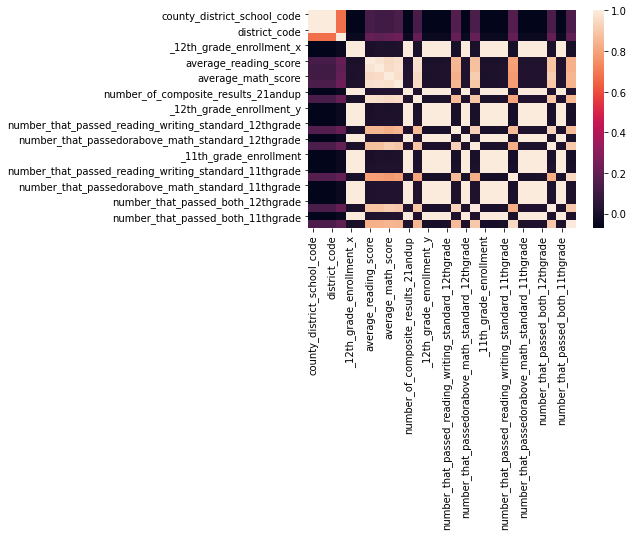

In [54]:
#Heat map of final dataset used
sns.heatmap(resultrestrictive.corr())

<AxesSubplot:>

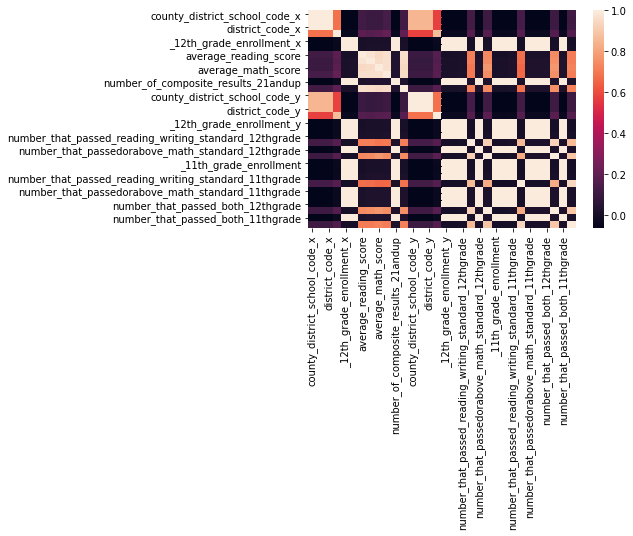

In [55]:
#Heat map of dataset prior to final
sns.heatmap(result1.corr())

<AxesSubplot:>

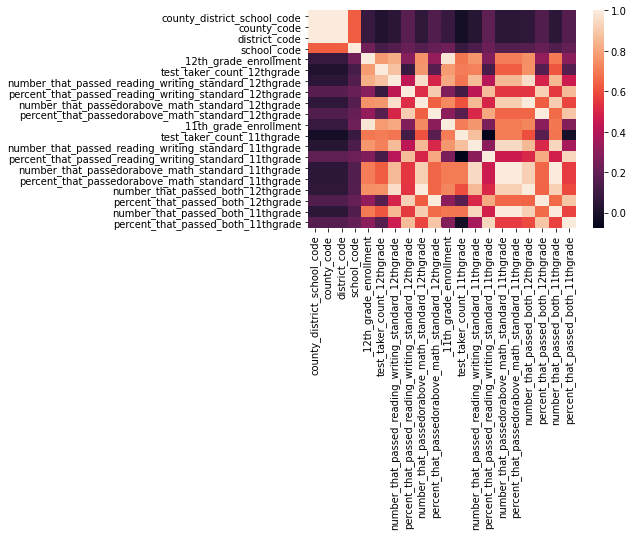

In [56]:
#Heatmap of SAT with no merge
sns.heatmap(dfs3.corr())

<AxesSubplot:>

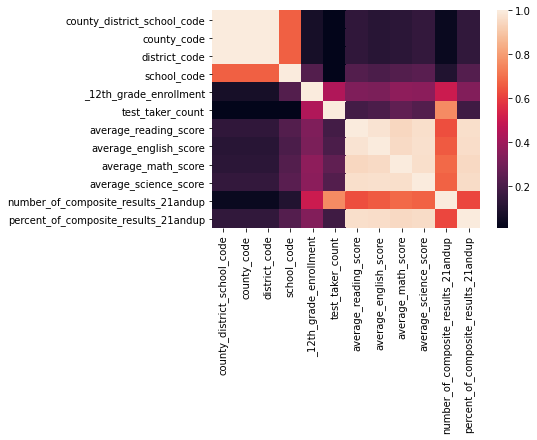

In [57]:
#ACT heat map without merge
sns.heatmap(dfa3.corr())

Text(0.5, 1.0, 'Figure 1')

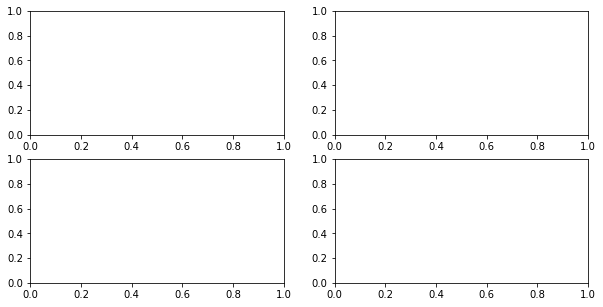

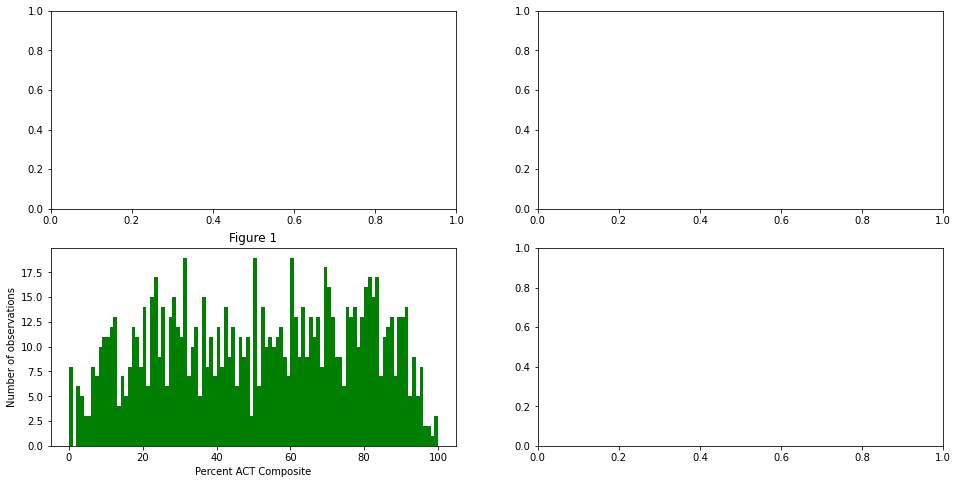

In [58]:
#Histogram of ACT-no merged frame
fig = plt.subplots(2, 2, figsize = (10, 5))
fig, ax = plt.subplots(2, 2, figsize = (16, 8))
ax[1][0].hist(dfa3['percent_of_composite_results_21andup'], bins = 100,
              color = 'green')
ax[1][0].set_xlabel('Percent ACT Composite')
ax[1][0].set_ylabel('Number of observations')
ax[1][0].set_title('Figure 1')



Text(0.5, 1.0, 'Figure 2')

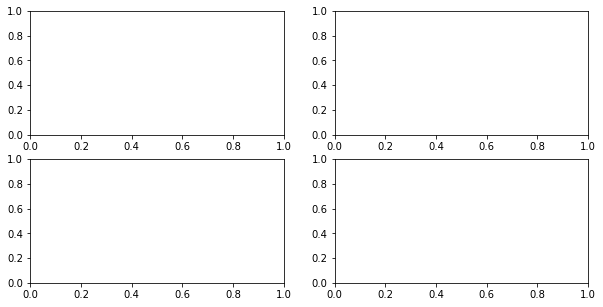

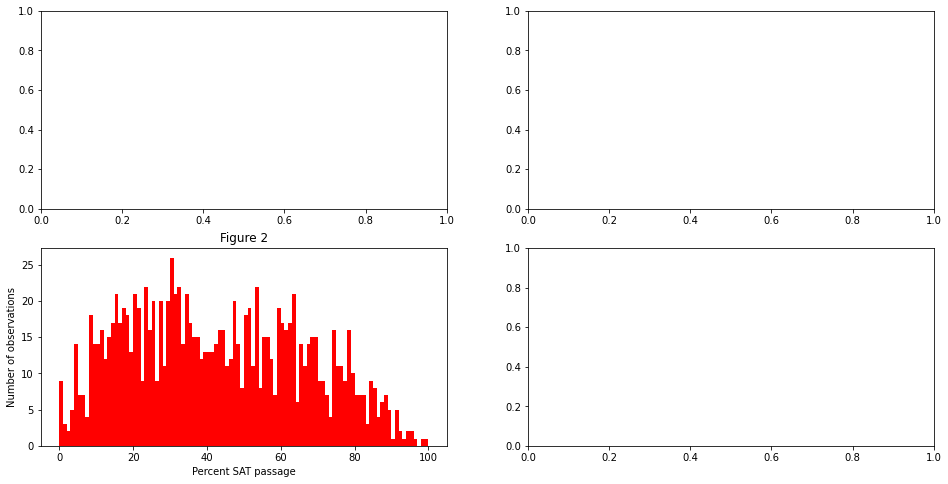

In [59]:
#Histogram of Percent SAT-no merged frame
fig = plt.subplots(2, 2, figsize = (10, 5))
fig, ax = plt.subplots(2, 2, figsize = (16, 8))
ax[1][0].hist(dfs3['percent_that_passed_both_12thgrade'],\
              bins=100, color='red')
ax[1][0].set_xlabel('Percent SAT passage')
ax[1][0].set_ylabel('Number of observations')
ax[1][0].set_title('Figure 2')



Text(0.5, 1.0, 'Figure 1')

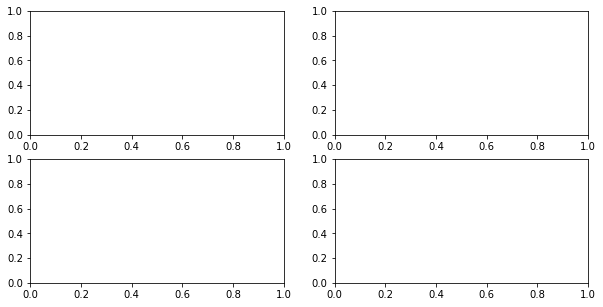

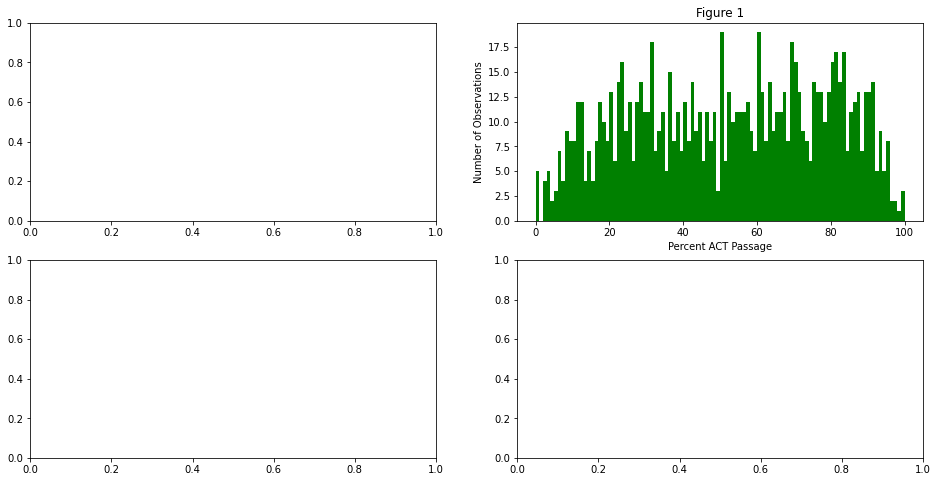

In [60]:
#Histogram of ACT merged frame
fig = plt.subplots(2, 2, figsize = (10, 5))
fig, ax = plt.subplots(2, 2, figsize = (16, 8))
ax[0][1].hist(resultrestrictive['percent_of_composite_results_21andup'], bins = 100,\
              color='green')
ax[0][1].set_xlabel('Percent ACT Passage')
ax[0][1].set_ylabel('Number of Observations')
ax[0][1].set_title('Figure 1')



Text(0.5, 1.0, 'Figure 2')

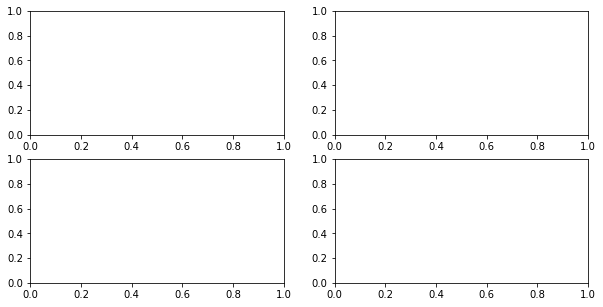

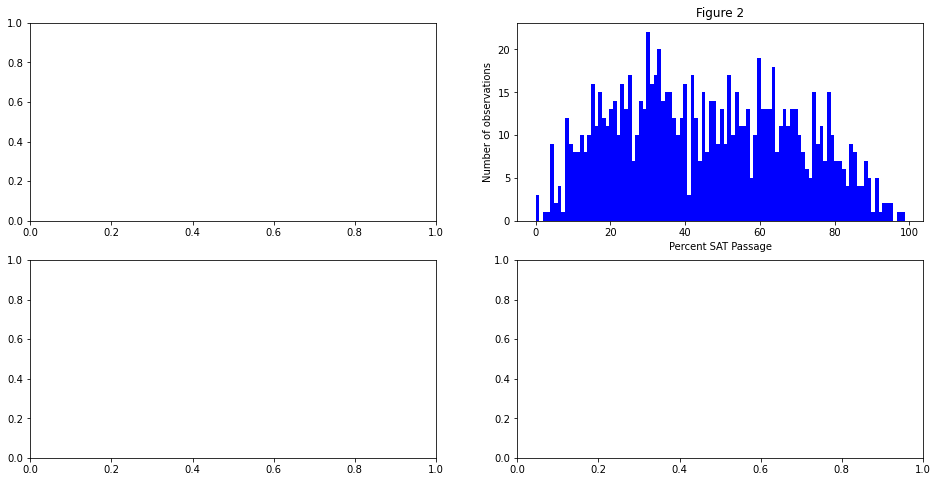

In [61]:
#Histogram of SAT merged frame
fig = plt.subplots(2, 2, figsize = (10, 5))
fig, ax = plt.subplots(2, 2, figsize = (16, 8))
ax[0][1].hist(resultrestrictive['percent_that_passed_both_12thgrade'], bins = 100,\
              color='blue')
ax[0][1].set_xlabel('Percent SAT Passage')
ax[0][1].set_ylabel('Number of observations')
ax[0][1].set_title('Figure 2')
#ax[1, 1].boxplot(result1)
#ax[1, 1].set_title('basic plot')

In [62]:
## Conclusions and Recommendations

The ACT should be the required test that we tout. While this is the bottom line, I must share that these are inferences based one snapshot of CA detail. The same testtakers may score differently on each test.  Moreover, small school data was held back because disclosing the data would disclose the identity of the children who took these tests. Moreover, there is no way to be sure whether the people who took the SAT and ACT were the same children. It could be different populations taking different tests. A future scientist might take the ACT as there is a science section whereas SAT has no section labeled science. Furthermore, I had difficulty slicing county, district, and aggregate data. The results I report are based on individual high schools. According to a google search of the number of high schools in CA, there are 3,892 high schools there. This dataset started at about 2500 and that included repeated county data. Moreover, there were missing values that were dropped or hidden for privacy reasons. 

Even with these limitations, the data support my initial statement regarding the ACT. While there are differences in the tests, it should not surprise us that they are related. A measure of how directly or inversely related the tests are is correlation .899 is the correlation between the percent that score 21 or above on the ACT and the percent that meet the minimum standard or above on the SAT. The highest correlation can be is 1.000 or -1.000. The least would be 0.. This is a relatively high number. This is not surprising as both are measures of academic knowledge. 

Here are the differences. In looking at the histograms, SAT is skewed positively while the ACT has no real skew. The ACT does appear to have larger ends.  The ACT has a higher mean or average, 52%,for percentages of passage than the SAT mean or average of 45%. This would suggest that the 'easier' number to achieve is the ACT since more students reach it. If you can tout a higher average, you will have greater credibility. Another observation is that the passage rates for the SAT have lower variance or to state otherwise, ACT has more variance. The standard deviation of approximately 26 and the variance of 676 for the ACT compared to  23 and 529 for the SAT. In laymen's terms this suggests a greater spread between the testakers in the achieved amount. This observation means that the ACT does a better job of separating students, showing their difference.This helps educators categorize. In addition, the higher variance suggests risk evaluation should be a key element in your decision. If you wish to be aggressive and are committed to massive educational policy change, the ACT is better as you could be further away from the mean.. It will allow you to show a greater change, assuming the program is succesful in comparison to the rest of the state. However, if you wish to be conservative and are not as interested or don't believe there will be much progress, the SAT is better. It is more likely that it will hug the center. Given your desire to move the needle, I would recommend that you mandate the ACT. It seems to be easier test or the standard is less than the SAT. If progress is more finely measured as suggested by the ACT's variance, this would give you the chance to show your education rogram will make progress. Either way, politically, you would win and increase your political capital.

In conclusion, I urge you to mandate and tout the ACT.
